In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')

Data Set Information:

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
Notes:
1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.


Attribute Information:

1.date: Date in format dd/mm/yyyy
2.time: time in format hh:mm:ss
3.global_active_power: household global minute-averaged active power (in kilowatt)
4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5.voltage: minute-averaged voltage (in volt)
6.global_intensity: household global minute-averaged current intensity (in ampere)
7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [6]:
data = pd.read_csv(r"C:\Users\Keerthy\Downloads\household_power_consumption\household_power_consumption.txt",sep =';')

In [7]:
df=data.sample(n=50000)

In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1786589 to 691393
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   50000 non-null  object 
 1   Time                   50000 non-null  object 
 2   Global_active_power    50000 non-null  object 
 3   Global_reactive_power  50000 non-null  object 
 4   Voltage                50000 non-null  object 
 5   Global_intensity       50000 non-null  object 
 6   Sub_metering_1         50000 non-null  object 
 7   Sub_metering_2         50000 non-null  object 
 8   Sub_metering_3         49405 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.8+ MB


In [9]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [10]:
df.dropna(inplace=True)

In [11]:
df=df.astype({'Global_active_power':'float','Global_reactive_power':'float','Voltage':'float', 'Global_intensity':'float', 'Sub_metering_1':'float', 'Sub_metering_2':'float'})


In [12]:
df['Date']=pd.to_datetime(df['Date'])


In [13]:
df['Time']=pd.to_datetime(df['Time'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49405 entries, 1786589 to 691393
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   49405 non-null  datetime64[ns]
 1   Time                   49405 non-null  datetime64[ns]
 2   Global_active_power    49405 non-null  float64       
 3   Global_reactive_power  49405 non-null  float64       
 4   Voltage                49405 non-null  float64       
 5   Global_intensity       49405 non-null  float64       
 6   Sub_metering_1         49405 non-null  float64       
 7   Sub_metering_2         49405 non-null  float64       
 8   Sub_metering_3         49405 non-null  float64       
dtypes: datetime64[ns](2), float64(7)
memory usage: 3.8 MB


In [15]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1786589,2010-10-05,2022-11-06 09:53:00,1.314,0.066,240.74,5.4,0.0,0.0,19.0
832771,2008-07-17,2022-11-06 00:55:00,0.270,0.120,239.93,1.4,0.0,0.0,1.0
1721763,2010-03-26,2022-11-06 09:27:00,1.406,0.108,240.85,5.8,0.0,0.0,18.0
415968,2007-01-10,2022-11-06 14:12:00,0.290,0.052,241.07,1.2,0.0,0.0,0.0
1412757,2009-08-23,2022-11-06 19:21:00,0.564,0.416,242.16,2.8,0.0,0.0,0.0


In [16]:
df['year'] = df['Date'].dt.year

In [17]:
df['month'] =df['Date'].dt.month
df['days'] = df['Date'].dt.day

In [18]:
df['time']=df['Time'].dt.time

In [19]:
df['hour']=df['Time'].dt.hour

In [20]:
df['minutes']=df['Time'].dt.minute

In [21]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,days,time,hour,minutes
1786589,2010-10-05,2022-11-06 09:53:00,1.314,0.066,240.74,5.4,0.0,0.0,19.0,2010,10,5,09:53:00,9,53
832771,2008-07-17,2022-11-06 00:55:00,0.270,0.120,239.93,1.4,0.0,0.0,1.0,2008,7,17,00:55:00,0,55
1721763,2010-03-26,2022-11-06 09:27:00,1.406,0.108,240.85,5.8,0.0,0.0,18.0,2010,3,26,09:27:00,9,27
415968,2007-01-10,2022-11-06 14:12:00,0.290,0.052,241.07,1.2,0.0,0.0,0.0,2007,1,10,14:12:00,14,12
1412757,2009-08-23,2022-11-06 19:21:00,0.564,0.416,242.16,2.8,0.0,0.0,0.0,2009,8,23,19:21:00,19,21


In [22]:

df['Total_metering']=df['Sub_metering_1']+df['Sub_metering_2']+df['Sub_metering_3']

In [23]:
df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,days,time,hour,minutes,Total_metering
1786589,2010-10-05,2022-11-06 09:53:00,1.314,0.066,240.74,5.4,0.0,0.0,19.0,2010,10,5,09:53:00,9,53,19.0
832771,2008-07-17,2022-11-06 00:55:00,0.270,0.120,239.93,1.4,0.0,0.0,1.0,2008,7,17,00:55:00,0,55,1.0
1721763,2010-03-26,2022-11-06 09:27:00,1.406,0.108,240.85,5.8,0.0,0.0,18.0,2010,3,26,09:27:00,9,27,18.0
415968,2007-01-10,2022-11-06 14:12:00,0.290,0.052,241.07,1.2,0.0,0.0,0.0,2007,1,10,14:12:00,14,12,0.0
1412757,2009-08-23,2022-11-06 19:21:00,0.564,0.416,242.16,2.8,0.0,0.0,0.0,2009,8,23,19:21:00,19,21,0.0


In [24]:
df.drop(['Date','Time','time','Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1,inplace=True)


In [25]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,year,month,days,hour,minutes,Total_metering
1786589,1.314,0.066,240.74,5.4,2010,10,5,9,53,19.0
832771,0.270,0.120,239.93,1.4,2008,7,17,0,55,1.0
1721763,1.406,0.108,240.85,5.8,2010,3,26,9,27,18.0
415968,0.290,0.052,241.07,1.2,2007,1,10,14,12,0.0
1412757,0.564,0.416,242.16,2.8,2009,8,23,19,21,0.0


In [26]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,year,month,days,hour,minutes,Total_metering
count,49405.000000,49405.000000,49405.000000,49405.000000,49405.000000,49405.000000,49405.000000,49405.000000,49405.000000,49405.000000
mean,1.085112,0.124323,240.844189,4.601251,2008.425301,6.497298,15.667038,11.522012,29.572897,8.817043
std,1.052626,0.113061,3.232677,4.426307,1.123764,3.443998,8.826837,6.915057,17.312340,12.847063
min,0.076000,0.000000,225.440000,0.200000,2006.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.310000,0.048000,239.010000,1.400000,2007.000000,4.000000,8.000000,6.000000,15.000000,0.000000
50%,0.592000,0.100000,241.020000,2.600000,2008.000000,7.000000,16.000000,12.000000,30.000000,1.000000
75%,1.522000,0.194000,242.890000,6.400000,2009.000000,10.000000,23.000000,18.000000,45.000000,18.000000
max,10.162000,1.218000,253.610000,44.200000,2010.000000,12.000000,31.000000,23.000000,59.000000,128.000000


In [27]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,year,month,days,hour,minutes,Total_metering
Global_active_power,1.000000,0.251617,-0.403013,0.998859,-0.025150,0.009303,-0.012651,0.280418,0.008330,0.850543
Global_reactive_power,0.251617,1.000000,-0.109680,0.270966,0.047434,0.014123,0.002865,0.134829,-0.000423,0.180635
Voltage,-0.403013,-0.109680,1.000000,-0.414573,0.245106,0.039352,0.002042,-0.171032,0.005509,-0.348295
Global_intensity,0.998859,0.270966,-0.414573,1.000000,-0.029338,0.008809,-0.012732,0.280824,0.008385,0.847481
year,-0.025150,0.047434,0.245106,-0.029338,1.000000,-0.079701,-0.034192,0.009727,0.003518,0.023485
month,0.009303,0.014123,0.039352,0.008809,-0.079701,1.000000,0.007516,-0.004369,0.000756,0.001055
days,-0.012651,0.002865,0.002042,-0.012732,-0.034192,0.007516,1.000000,0.004728,-0.001584,-0.009765
hour,0.280418,0.134829,-0.171032,0.280824,0.009727,-0.004369,0.004728,1.000000,0.001342,0.164592
minutes,0.008330,-0.000423,0.005509,0.008385,0.003518,0.000756,-0.001584,0.001342,1.000000,0.001693
Total_metering,0.850543,0.180635,-0.348295,0.847481,0.023485,0.001055,-0.009765,0.164592,0.001693,1.000000


In [28]:
numerical_feature=[feature for feature in df.columns if df[feature].dtype!='O']

print('The numerical feature is {} and the feature are {}'.format(len(numerical_feature),numerical_feature))



The numerical feature is 10 and the feature are ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'year', 'month', 'days', 'hour', 'minutes', 'Total_metering']


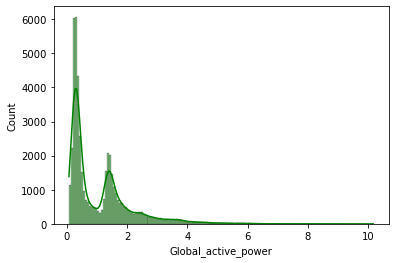

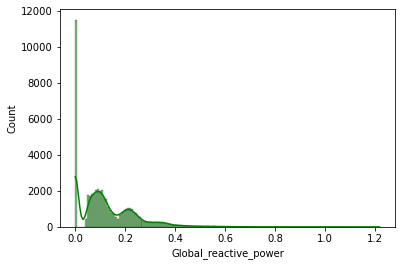

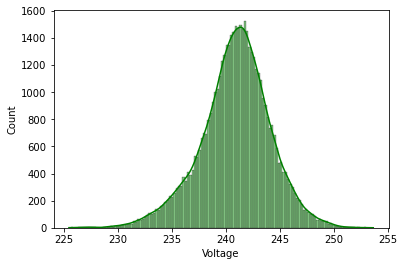

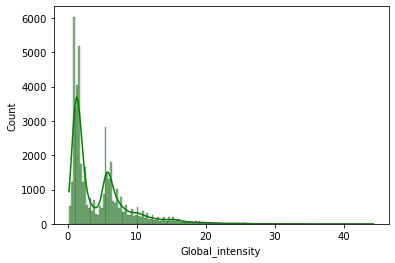

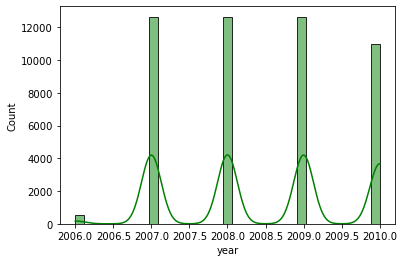

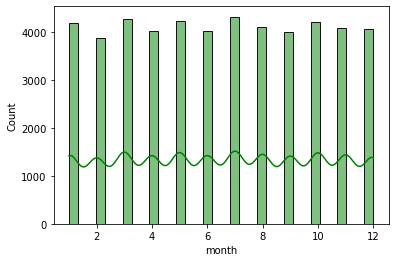

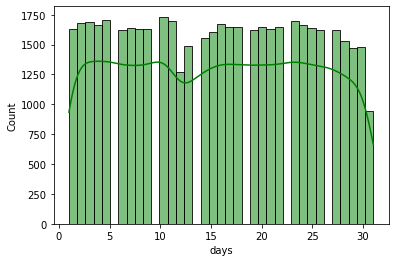

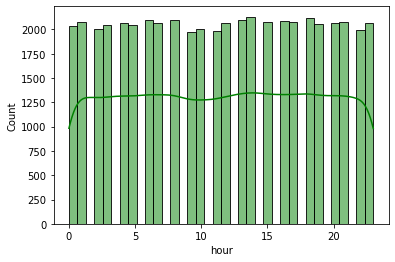

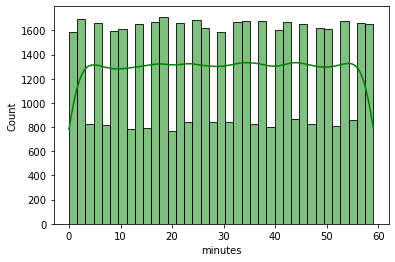

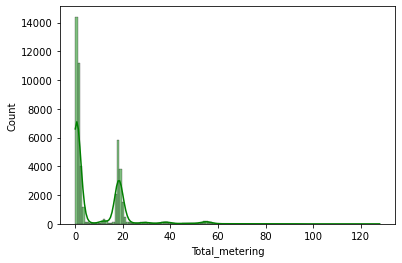

In [29]:
for feature in numerical_feature:
    sns.histplot(data=df,x=feature,kde=True,color='g')
    plt.show()

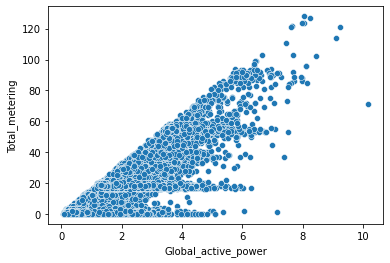

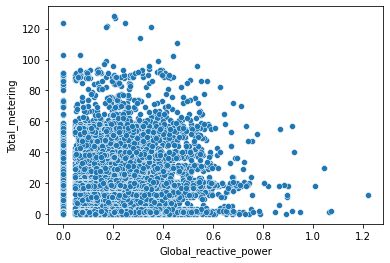

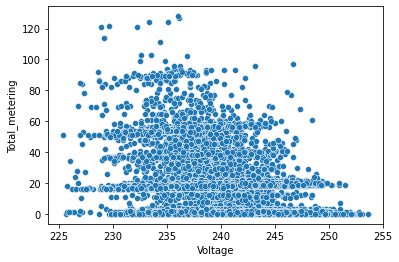

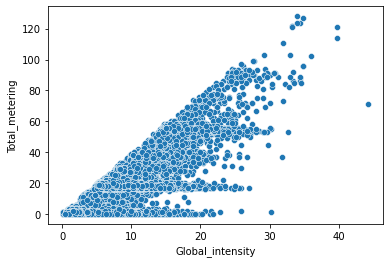

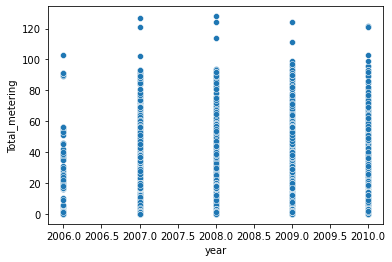

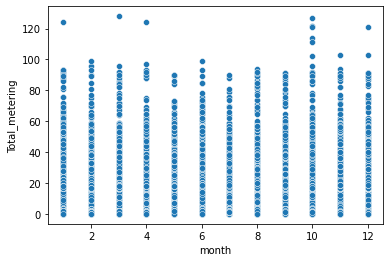

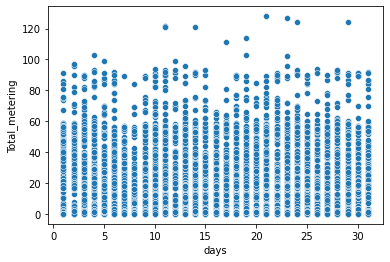

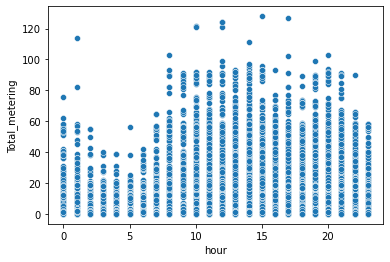

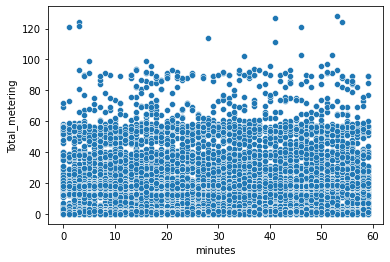

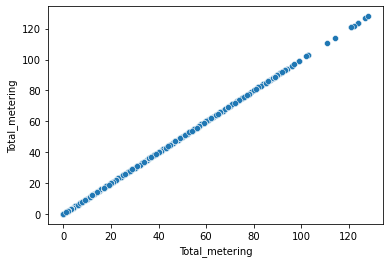

In [30]:
for feature in numerical_feature:
    sns.scatterplot(data=df,x=feature,y='Total_metering')
    plt.show()

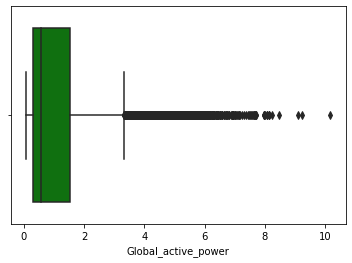

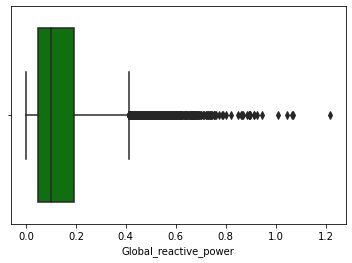

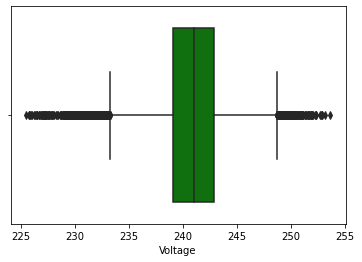

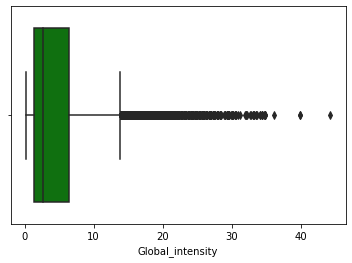

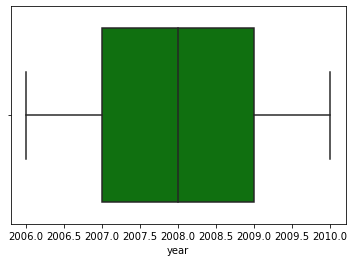

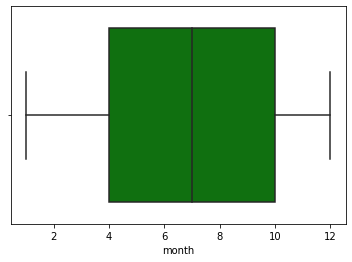

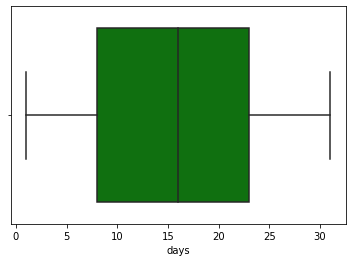

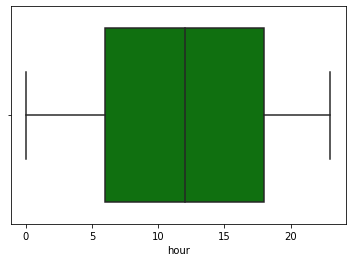

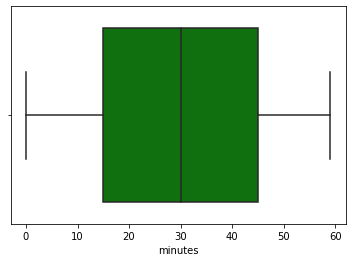

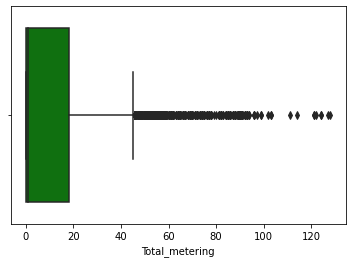

In [31]:
for feature in numerical_feature:
    sns.boxplot(data=df,x=feature,color='g')
    plt.show()

<AxesSubplot:>

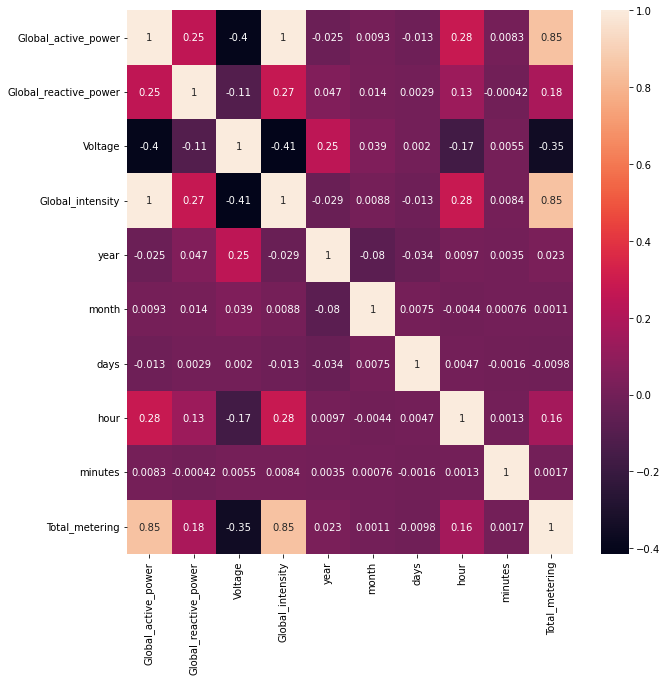

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)


In [33]:
#function to detect outlier
def Outlier(df,variable):
    q1=df[variable].quantile(0.25)
    q3=df[variable].quantile(0.75)
    IQR=q3-q1
    lf=q1-IQR*1.5
    uf=q3+IQR*1.5
    return lf,uf

#function to remove outlier
def outlier_removal(df,columns):
    for col in columns:
        lf,uf=Outlier(X,col)
        df.loc[(df[col]<lf), col]=lf
        df.loc[(df[col]>uf),col]=uf

In [34]:
outlier_removal(X,X.columns)

NameError: name 'X' is not defined

In [ ]:
sns.pairplot(df)


In [35]:
X = df.drop(['Total_metering'],axis=1)

In [36]:
y=df['Total_metering']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.30)

In [39]:
X_train.shape

(34583, 9)

In [40]:
y_train.shape

(34583,)

In [41]:
X_test.shape

(14822, 9)

In [42]:
y_test.shape

(14822,)

In [43]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [44]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [45]:
preprocess_model = [X_train,y_train,X_test,y_test]

In [46]:
import pickle

In [47]:
pickle.dump(preprocess_model, open('preprocess_model.pkl','wb'))

In [48]:
preprocess_model=pickle.load(open('preprocess_model.pkl','rb'))

In [52]:
X

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,year,month,days,hour,minutes
1786589,1.314,0.066,240.74,5.4,2010,10,5,9,53
832771,0.270,0.120,239.93,1.4,2008,7,17,0,55
1721763,1.406,0.108,240.85,5.8,2010,3,26,9,27
415968,0.290,0.052,241.07,1.2,2007,1,10,14,12
1412757,0.564,0.416,242.16,2.8,2009,8,23,19,21
...,...,...,...,...,...,...,...,...,...
1969581,0.366,0.152,242.82,1.6,2010,9,14,11,45
1609557,1.336,0.000,243.18,5.4,2010,7,1,11,21
540356,1.942,0.000,242.82,8.0,2007,12,26,23,20
1088698,3.402,0.492,240.18,14.2,2009,10,1,18,22


In [49]:
X_train

array([[ 0.66386458,  1.51340943, -0.35371018, ..., -0.20223687,
         0.93977274,  1.4641279 ],
       [ 0.43922164, -0.02164272, -0.32279774, ...,  0.02361874,
        -0.65015569,  1.40645413],
       [-0.70112686, -1.09794366,  1.36193034, ..., -1.44444272,
        -1.22831148, -0.55445399],
       ...,
       [-0.86294593,  0.22537716, -0.27952032, ..., -0.20223687,
         1.22885064, -0.84282283],
       [-0.72777942, -0.21572978,  0.6942216 , ...,  0.81411337,
        -1.51738938,  1.00273775],
       [ 0.40495407,  0.4371085 , -1.00905395, ..., -1.10565931,
         0.217078  ,  0.94506398]])

In [50]:
X_test

array([[-0.58499788,  0.01364583, -0.01676457, ...,  0.02361874,
         0.65069484,  0.195305  ],
       [ 0.31547765, -0.40981683,  0.14088889, ...,  0.58825776,
         0.07253905, -0.49678022],
       [-0.76775824,  1.10759105,  0.92297367, ...,  0.13654654,
         1.66246748, -0.78514906],
       ...,
       [ 0.3706865 , -1.09794366,  0.27381239, ...,  0.81411337,
         0.36161695, -0.95817037],
       [ 1.26925828, -0.56861533, -0.35061894, ...,  1.15289678,
         0.217078  ,  0.48367384],
       [-0.82106335,  0.13715578,  0.01723912, ..., -0.08930907,
         1.37338958,  0.88739022]])

In [52]:

from sklearn.linear_model import LinearRegression

In [53]:
lr=LinearRegression()

In [54]:
lr.fit(X_train,y_train)

LinearRegression()

In [55]:
lr_pred=lr.predict(X_test)

In [56]:
lr_pred

array([ 1.10083276,  0.33952386,  0.45490069, ..., -2.28099971,
       -0.70233227,  2.63188395])

In [57]:
print(lr.coef_)

[20.23665772 -0.25158287 -0.52951093 -9.02627023  0.66578052 -0.0444599
  0.04672957 -1.10584    -0.04946658]


In [58]:
print(lr.intercept_)

8.869462116830537


<AxesSubplot:xlabel='Total_metering'>

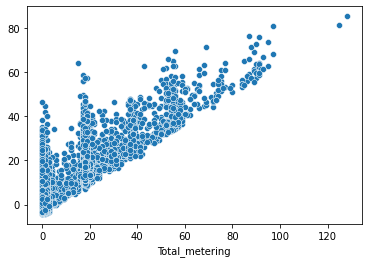

In [59]:

sns.scatterplot(y_test,lr_pred)

<AxesSubplot:xlabel='Total_metering', ylabel='Density'>

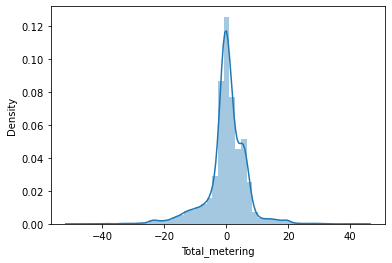

In [60]:
residual=y_test-lr_pred
sns.distplot(residual,kde=True)

<AxesSubplot:ylabel='Total_metering'>

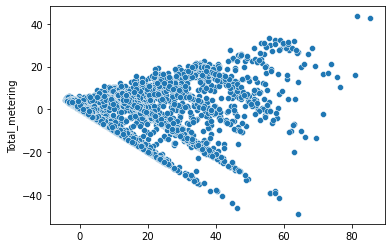

In [61]:
sns.scatterplot(lr_pred,residual)

In [62]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [63]:
print(mean_absolute_error(y_test,lr_pred))
print(mean_squared_error(y_test,lr_pred))
print(np.sqrt(mean_squared_error(y_test,lr_pred)))

4.2670630441310315
43.149156618088504
6.568801764255678


In [64]:
from sklearn.metrics import r2_score
score=r2_score(y_test,lr_pred)
print(score)

0.7406468824286907


In [65]:
1-(1-score)*len(y_test)/(len(y_test)-X_test.shape[1]-1)

0.7404717739839055

In [66]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [67]:
ridge=Ridge()
lasso=Lasso()
el_net=ElasticNet()

In [68]:
ridge.fit(X_train,y_train)

Ridge()

In [69]:
ridge_pred=ridge.predict(X_test)

In [70]:
ridge.coef_

array([19.76581195, -0.2612341 , -0.52336402, -8.55081457,  0.66669034,
       -0.04447599,  0.04680759, -1.1049463 , -0.04946444])

In [71]:
ridge.intercept_

8.869462116830535

<AxesSubplot:xlabel='Total_metering'>

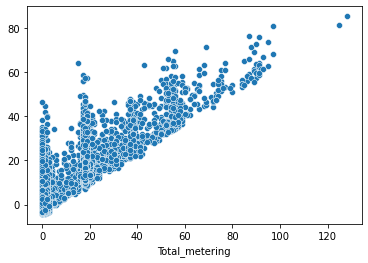

In [72]:
sns.scatterplot(y_test,ridge_pred)

<AxesSubplot:xlabel='Total_metering', ylabel='Density'>

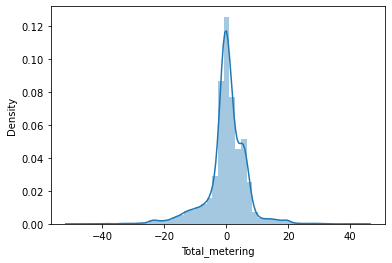

In [73]:
ridge_residual=y_test-ridge_pred
sns.distplot(residual,kde=True)

<AxesSubplot:ylabel='Total_metering'>

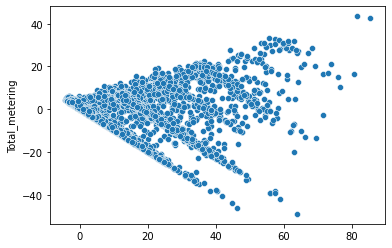

In [74]:

sns.scatterplot(ridge_pred,ridge_residual)

In [75]:
print(mean_absolute_error(y_test,ridge_pred))
print(mean_squared_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

4.268091374189862
43.15764825256062
6.5694480934520385


In [76]:
r2_score(y_test,ridge_pred)

0.7405958424537241

In [77]:
lasso.fit(X_train,y_train)

Lasso()

In [78]:
lasso_pred=lasso.predict(X_test)


<AxesSubplot:xlabel='Total_metering'>

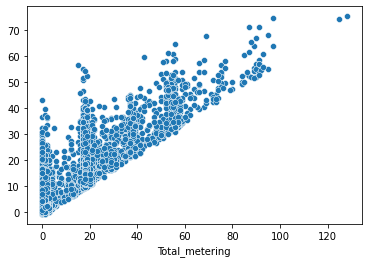

In [79]:

sns.scatterplot(y_test,lasso_pred)

<AxesSubplot:xlabel='Total_metering', ylabel='Density'>

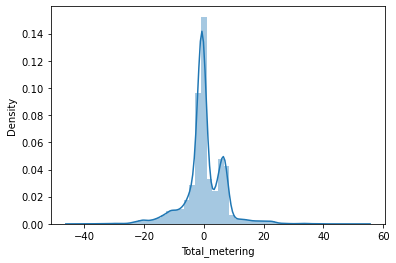

In [80]:
lasso_residual=y_test-lasso_pred
sns.distplot(lasso_residual,kde=True)

<AxesSubplot:ylabel='Total_metering'>

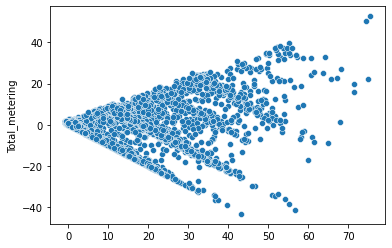

In [81]:
sns.scatterplot(lasso_pred,lasso_residual)

In [82]:
el_net.fit(X_train,y_train)

ElasticNet()

In [83]:
el_net_pred=el_net.predict(X_test)

<AxesSubplot:xlabel='Total_metering'>

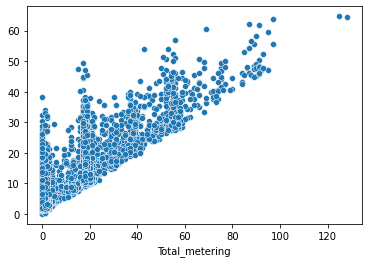

In [84]:
sns.scatterplot(y_test,el_net_pred)

<AxesSubplot:xlabel='Total_metering', ylabel='Density'>

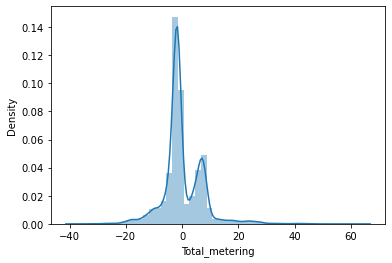

In [85]:
el_net_residual=y_test-el_net_pred
sns.distplot(el_net_residual,kde=True)

<AxesSubplot:ylabel='Total_metering'>

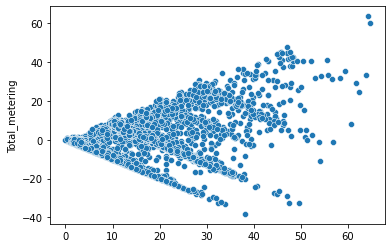

In [86]:
sns.scatterplot(el_net_pred,el_net_residual)

In [87]:
r2_score(y_test,el_net_pred)

0.68618195180116